In [2]:
# import needed libraries
import pandas as pd 

# import graphing library
import matplotlib.pyplot as plt

import os  # for OS interface (to get/change directory)
# display and set working/data directory
os.getcwd()
os.chdir('E:/sarik/spring2023/724-DataAnalytics_SocialMedia/Project/github/NLP_on_Social_Media_Data/data/')
os.getcwd()

'E:\\sarik\\spring2023\\724-DataAnalytics_SocialMedia\\Project\\github\\NLP_on_Social_Media_Data\\data'

In [4]:
pd.set_option('display.max_columns', None)
df_combined_annotations = pd.read_csv("combined_annotations_2023-04-02_20.13.51.914670.tsv", sep="\t", index_col=0)
df_all_data_norm = pd.read_csv("combined_model_data_all_norm_2023-04-02_20.13.51.914670.tsv", sep="\t", index_col=0)


In [5]:
merged_df = df_combined_annotations.merge(df_all_data_norm[['conversation_id', 'normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']], on='conversation_id', how='left')


In [6]:
def get_stats(score):
    if score < 0.4:
        return 'Negative'
    elif score >= 0.4 and score <=0.6:
        return 'Neutral'
    elif score > 0.6:
        return 'Positive'

In [7]:
merged_df['stats_textblob'] = merged_df['normalized_textblob_Polarity'].apply(get_stats)
merged_df['stats_vader'] = merged_df['normalized_vader_Polarity'].apply(get_stats)
merged_df['stats_afinn'] = merged_df['normalized_AFINN_scores'].apply(get_stats)
merged_df['stats_sentiword'] = merged_df['normalized_SentiWordNet_scores'].apply(get_stats)

In [8]:
merged_df['stats_textblob'].value_counts()

Neutral     220
Positive     59
Negative     21
Name: stats_textblob, dtype: int64

In [9]:
merged_df['stats_vader'].value_counts()

Neutral     125
Negative     88
Positive     87
Name: stats_vader, dtype: int64

In [10]:
merged_df['stats_afinn'].value_counts()

Neutral     268
Negative     26
Positive      6
Name: stats_afinn, dtype: int64

In [11]:
merged_df['stats_sentiword'].value_counts()

Neutral     222
Negative     76
Positive      2
Name: stats_sentiword, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_hist(col, df):
    color_dict = {'Negative': '#eb3434', 'Neutral': '#347aeb', 'Positive': '#34eb7a'}
    order  = ['Negative', 'Neutral', 'Positive']
    sns.countplot(data=df,x=col, order=order, palette=color_dict)
    plt.xlabel('')
    plt.title('Distribution of tweets in annotated dataset')
    plt.ylabel('Tweets')
    plt.show()

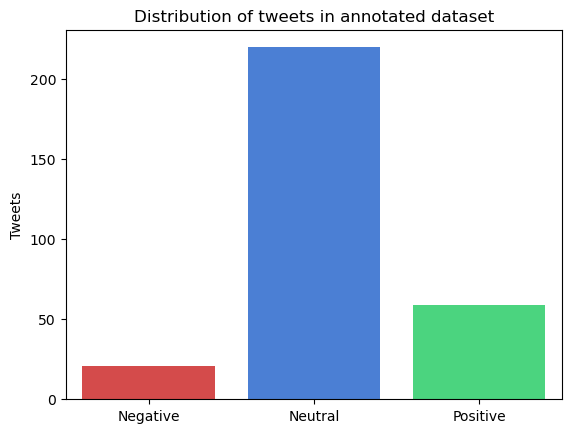

In [19]:
plot_hist('stats_textblob', merged_df )

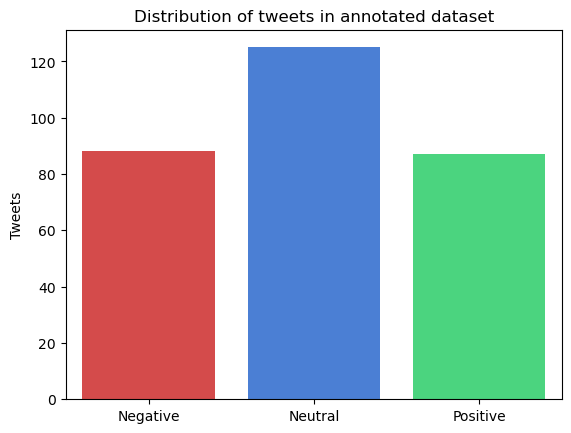

In [20]:
plot_hist('stats_vader', merged_df )

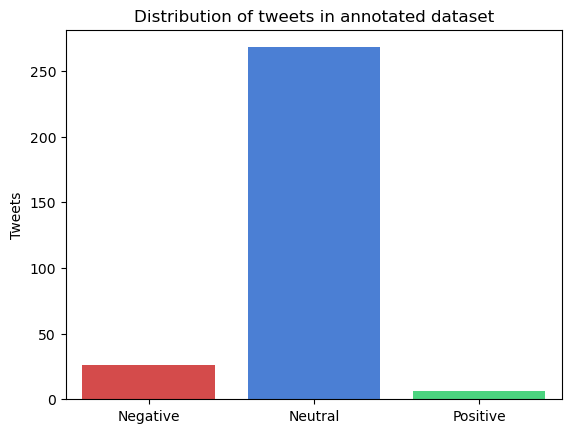

In [21]:
plot_hist('stats_afinn', merged_df )

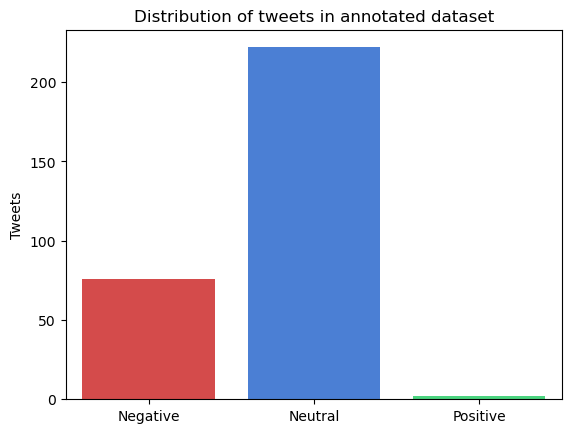

In [22]:
plot_hist('stats_sentiword', merged_df )

In [23]:
merged_df['our_label'] = merged_df['our_label'].str.capitalize()

In [26]:
from sklearn.metrics import classification_report, accuracy_score

def get_evaluation(actual, predicted):
    actual_col = actual
    # predicted_col = 'stats_textblob'
    predicted_col = predicted

    # Define class labels
    labels = ['Negative', 'Neutral', 'Positive']

    # Calculate precision, recall, f1-score, and support for each class
    report = classification_report(merged_df[actual_col], merged_df[predicted_col], labels=labels)
    accuracy = accuracy_score(merged_df[actual_col], merged_df[predicted_col])
    
    return report, accuracy

In [27]:
report, accuracy = get_evaluation('our_label', 'stats_textblob')

print(report)
print('Overall Accuracy is: ', accuracy)

              precision    recall  f1-score   support

    Negative       0.43      0.10      0.16        93
     Neutral       0.59      0.75      0.66       173
    Positive       0.20      0.35      0.26        34

    accuracy                           0.50       300
   macro avg       0.41      0.40      0.36       300
weighted avg       0.49      0.50      0.46       300

Overall Accuracy is:  0.5


In [28]:
report, accuracy = get_evaluation('our_label', 'stats_vader')

print(report)
print('Overall Accuracy is: ', accuracy)

              precision    recall  f1-score   support

    Negative       0.45      0.43      0.44        93
     Neutral       0.69      0.50      0.58       173
    Positive       0.17      0.44      0.25        34

    accuracy                           0.47       300
   macro avg       0.44      0.46      0.42       300
weighted avg       0.56      0.47      0.50       300

Overall Accuracy is:  0.47


In [29]:
report, accuracy = get_evaluation('our_label', 'stats_afinn')

print(report)
print('Overall Accuracy is: ', accuracy)

              precision    recall  f1-score   support

    Negative       0.69      0.19      0.30        93
     Neutral       0.61      0.94      0.74       173
    Positive       0.17      0.03      0.05        34

    accuracy                           0.61       300
   macro avg       0.49      0.39      0.36       300
weighted avg       0.58      0.61      0.53       300

Overall Accuracy is:  0.6066666666666667


In [30]:
report, accuracy = get_evaluation('our_label', 'stats_sentiword')

print(report)
print('Overall Accuracy is: ', accuracy)

              precision    recall  f1-score   support

    Negative       0.45      0.37      0.40        93
     Neutral       0.63      0.80      0.70       173
    Positive       0.50      0.03      0.06        34

    accuracy                           0.58       300
   macro avg       0.52      0.40      0.39       300
weighted avg       0.56      0.58      0.54       300

Overall Accuracy is:  0.58
